In [8]:
#install.packages('ggplot2')
#install.packages('dplyr')

In [9]:
#library(ggplot2)
#library(dplyr)

# 16. plotnine

## 16.1 들어가기

## 16.2 시각적 맵핑(Aesthetic mapping)

In [10]:
# data(mpg, package='ggplot2')
from pydataset import data
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [11]:
import rpy2.rinterface

In [12]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [16]:
%%R
.libPaths("/home/publishingkwon/R/x86_64-pc-linux-gnu-library/3.6") # library 위치 설정

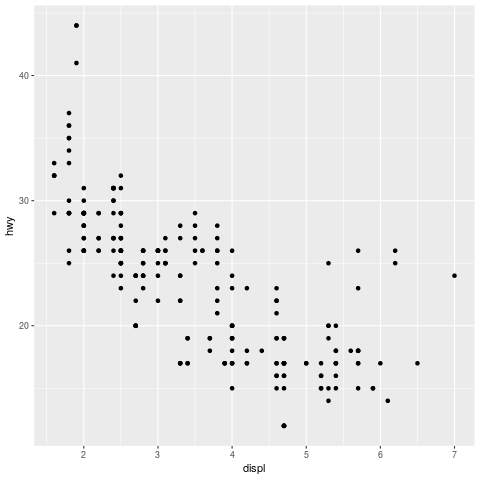

In [17]:
%%R
library(ggplot2)
#ggplot2 has mpg dataset
ggplot(data=mpg, aes(x=displ, y=hwy)) + geom_point()

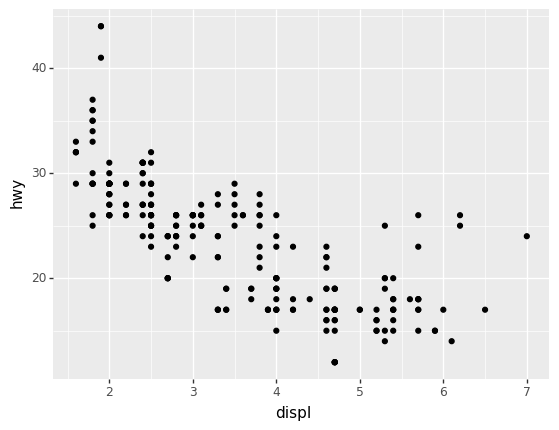

<ggplot: (8782503757018)>

In [18]:
from plotnine import *

ggplot(data=mpg, mapping = aes(x='displ', y='hwy')) + geom_point()

R에서 `ggplot`은 다음의 방법으로 활용할 수 있다. 

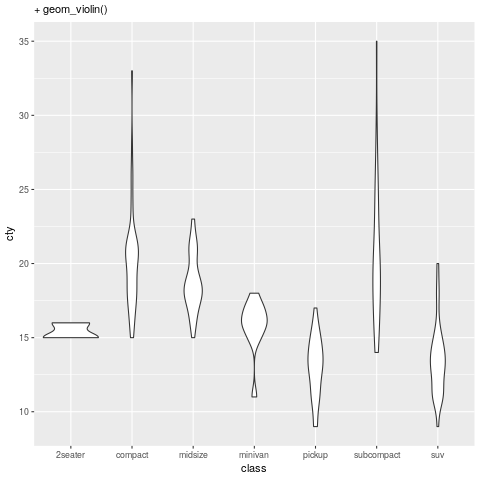

In [19]:
%%R
ggplot(mpg, aes(x=class, y=cty)) + geom_point() + 
  labs(subtitle = '+ geom_point()')
ggplot(mpg, aes(x=class, y=cty)) + geom_jitter(width=0.2) + 
  labs(subtitle = '+ geom_jitter(width=0.2)')
ggplot(mpg, aes(x=class, y=cty)) + geom_boxplot() +
  labs(subtitle = '+ geom_boxplot()')
ggplot(mpg, aes(x=class, y=cty)) + geom_violin() + 
  labs(subtitle = '+ geom_violin()')

`plotnine`은 R의 `ggplot2`의 함수를 거의 모두 Python으로 이식해 놓았다. 
하지만 완전히 동일하지는 않기 때문에 차이점에 유의할 필요가 있다.
대표적인 차이점은 다음과 같다.

1. `aes()` 함수 안에서 데이터의 변수와 그래프의 시각적 특성과 연결할 때,
변수 이름을 따옴표 안에 쓴다. 이는 R에서 `aes()` 대신 `aes_string()`을 쓰는 것과 비슷하다.
ex) `ggplot(data, mapping=aes_string(x='var1'))`

2. R의 `ggplot2` 함수는 인자이름에 `.`이 들어가는 경우가 있다. `plotnine`은 이들을 모두 `_`로 바꾸었다.
Python에서 `.`은 클래스의 메쏘드나 어트리뷰트를 나타내는 특별한 의미가 있기 때문이다.

3. R에서는 하나의 플롯을 위해 줄의 마지막에 `+`를 쓰고 다음 줄에 함수를 연결한다.
Python에서 여러 줄에 쓰기 위해서는 `+`를 쓰고 마지막에서 `\`로 적어서 줄이 연결됨을 명시적으로 나타내야 한다.
그리고 `\` 뒤에는 어떤 문자도 없어야 문법 오류가 발생하지 않으므로 주의해야 한다. 
이런 사실을 모른다면 디버깅 과정에서 Python은 오류 투성이의 프로그래밍 언어라고 말하면서 Python을 포기할지도 모른다(필자가 그랬다. ㅠ).

4. `plotnine`의 `ggplot`는 `ggplot(mapping=, data=)`이다. 인자의 순서에 유의하자.
그리고 Python에서는 매개변수의 이름이 붙어 있는 인자가 그렇지 않은 인자의 뒤에 나올 수 없다. (R은 전혀 상관없다.)
그래서 `ggplot(dat, aes(x='var1')`는 인자의 순서가 틀렸다. 
`ggplot(mapping =aes(x='var1'), dat)`이라고 써도 이름있는 인자가 이름없는 인자의 앞에 나왔기 때문에 문법 오류가 발생한다.
반면 `ggplot(mapping = aes(x='var1'), dat)`라고 써도 Python은 `dat`가 순서대로 `mapping =`에 대응한다고 생각하고, 
`mapping=`에 `aes()`와 `dat`가 모두 입력되었기 때문에 에러를 발생시킨다(이에 비해 R은 얼마나 영리한가?).
따라서 정상적인 방법은 `ggplot(data=dat, mapping = aes())` 또는 `ggplot(aes(), dat)`으로 써야 함을 유의하자.
그나마도 매개변수 이름을 적지 않을 때에는 `ggplot(dat, aes())`로 적어도 정상적으로 작동한다.

5. 개인적으로 `plotnine` 쓰는 것을 지지하는 것은 `ggplot`의 **G**rammar of **G**raphics를 지지하기 때문이다. 
하지만 `plotnine`이 완벽하게 `ggplot2`의 모든 기능을 지원하는 것은 아니므로, 
최근에 `ggplot2`의 기능이 필요한 작업이 있을 경우 `%%R`로 R의 `ggplot2`을 직접 활용하기도 한다.
`%%R -i dat`을 쓰면 python의 `dat`를 R에서 직접 활용할 수 있다. 


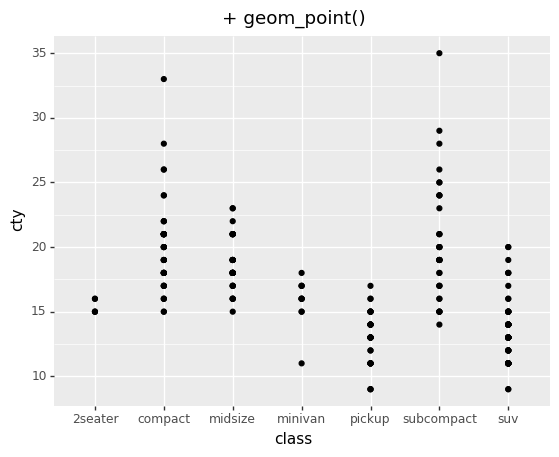

<ggplot: (-9223363254372887201)>

In [20]:
#ggplot(mpg, aes(x='class', y='cty')) + geom_point() + \
#  labs(subtitle = '+ geom_point()')  
# plotnine에는 아직 subtitle이 구현되지 않았다. 대신 title을 쓰자.
ggplot(mpg, aes(x='class', y='cty')) + geom_point() + \
  labs(title = '+ geom_point()') + theme(plot_title = element_text(hjust = 0.5))

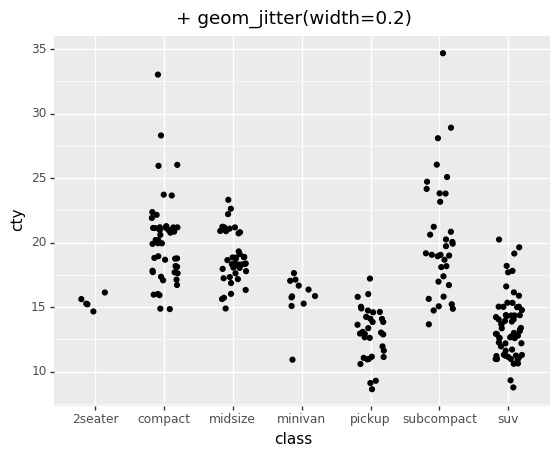

<ggplot: (-9223363254372930665)>

In [21]:
ggplot(mpg, aes(x='class', y='cty')) + geom_jitter(width=0.2) + \
  labs(title = '+ geom_jitter(width=0.2)')

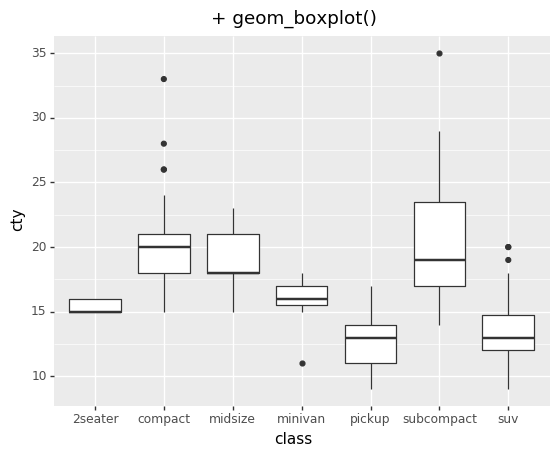

<ggplot: (-9223363254300848156)>

In [22]:
ggplot(mpg, aes(x='class', y='cty')) + geom_boxplot() + \
  labs(title = '+ geom_boxplot()')

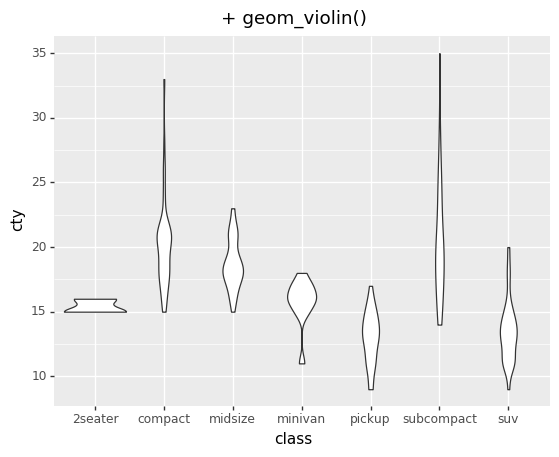

<ggplot: (8782481857656)>

In [23]:
ggplot(mpg, aes(x='class', y='cty')) + geom_violin() + \
  labs(title = '+ geom_violin()')